# Waves and Oscillations in physics


Waves can be represented by the following functions:

$y(x,t)= A\,\cos\left[k\,x - \omega\,t\right]$

$y(x,t)= A\,\cos\left[\omega\,\left(\frac{x}{v} - t\right)\right]$

$y(x,t)= A\,\cos\left[2\pi f\,\left(\frac{x}{v} - t\right)\right]$

$y(x,t)= A\,\cos\left[2\pi \,\left(\frac{x}{\lambda} - \frac{t}{T}\right)\right]$


where:

$v = \lambda f$

$k = \frac{2\pi}{\lambda}$

$\omega = 2\pi f = v\,k$

$T = \frac{1}{f}$


## Example:

$y(x,t) = 3.75\,\rm cm\left[\cos(0.450\,\rm cm^{-1}\,x - 5.40\,s^{-1}\,t)\right]$


$y(x,t)= A\,\cos\left[2\pi \,\left(\frac{x}{\lambda} - \frac{t}{T}\right)\right]$


(a) Plot $y(x,0)$ and at different times.

(b) Identify peaks and show oscillations of one peak.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def wave_function(x, t):
    y_xt = 3.75*np.cos(0.45*x - 5.4*t)
    return y_xt

In [3]:
def coef_function(factor):
    return (2*np.pi/factor)

In [6]:
L_wave = coef_function(0.45) # wavelength

T_period = coef_function(5.4) # period

print("Lambda in [cm]:", L_wave)
print("Period in [s]:", T_period)

Lambda in [cm]: 13.962634015954636
Period in [s]: 1.1635528346628863


### Plotting:

In [9]:
x = np.linspace(0, 4*L_wave, 1000,  endpoint=True)
y = wave_function(x, 0) # at t=0

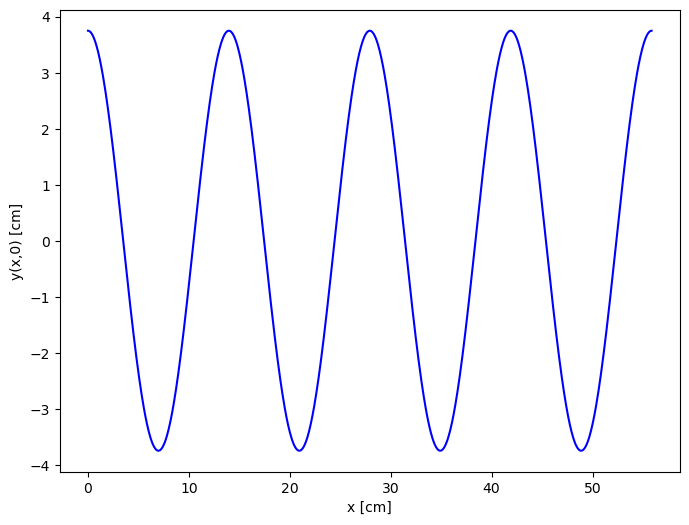

In [10]:
plt.figure(figsize= (8,6))

plt.plot(x, y, "blue")
plt.ylabel('y(x,0) [cm]')
plt.xlabel('x [cm]')
plt.show()

## Peak finding with scipy()

In [11]:
from scipy.signal import find_peaks

In [12]:
peaks, _ = find_peaks(y)
print(peaks)

[250 499 749]


### Wavelength:

In [14]:
L_peaks = x[peaks[1]] - x[peaks[0]]

print("Lambda in [cm]:", L_peaks )

Lambda in [cm]: 13.920704184074895


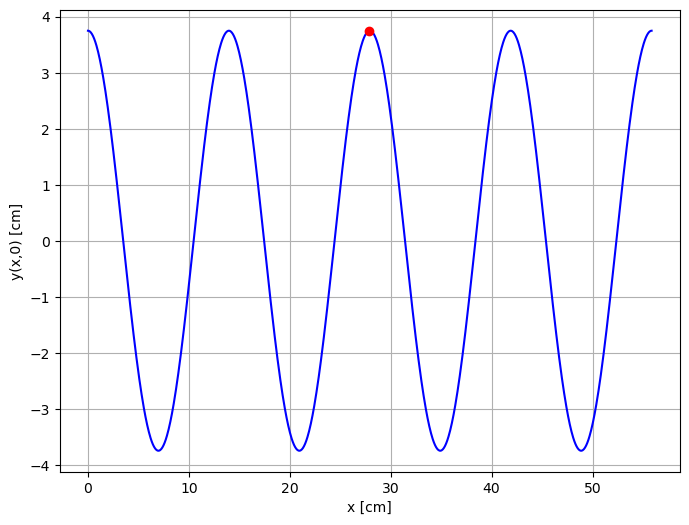

In [17]:
plt.figure(figsize= (8,6))

plt.plot(x, y, "blue")
plt.plot(x[peaks[1]], y[peaks[1]], 'ro', color = 'red')
plt.ylabel('y(x,0) [cm]')
plt.xlabel('x [cm]')
plt.grid()
plt.show()

### For many times:

In [23]:
times = np.arange(0, 5*T_period, T_period/128)

for t in times:
    #print(t)
    
    plt.figure(figsize= (8,6))
    y = wave_function(x, t)
    plt.plot(x, y, "blue")
    plt.plot(x[peaks[1]], y[peaks[1]], 'ro', color = 'red')
    plt.ylabel('y(x,0) [cm]')
    plt.xlabel('x [cm]')
    plt.grid()
    #plt.show() 
    plt.savefig("./Figures/wave_xy{:03f}.png".format(t))
    plt.close()

## Animation with Pillow

In [21]:
import glob
from PIL import Image

In [22]:
images_in = "./Figures/wave_xy****.png"

gif_image_out = "./Figures/wave_xy.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))

img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)